<h1> Exploratory Data Analysis <h1/>

<h3> DB Connection SQL Server <h3/>

In [50]:

# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import os
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import folium
from folium.plugins import HeatMap

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

#DB-Connection
driver = '{ODBC Driver 17 for SQL Server}' # This might be a different version on your system
server = 'ANNINAYOGA\SQLEXPRESS'
database = 'Immo'
username = 'immoadmin'
password = 'zhaw$1234'
connection_string = f"DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes;"

#Connection and SQL-Query for table property
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM property"
df_property = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

#Connection and SQL-Query for table location
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM location"
df_location = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

# Querying the cleaned property table
# Pfad zur CSV-Datei angeben
file_path = r'C:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience\filtered_property_location_clean.csv'

try:
    # Versuche, die CSV-Datei einzulesen mit dem spezifizierten Trennzeichen und Fehlerbehandlung
    df_filtered_property_location_clean = pd.read_csv(file_path, sep=';', quotechar='"', on_bad_lines='skip')
except Exception as e:
    print("Ein Fehler ist aufgetreten:", e)

C:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience


In [51]:
    num_entries = len(df_filtered_property_location_clean)
    print("Anzahl der Einträge:", num_entries)

Anzahl der Einträge: 8861


<h3>DB Connection MYSQL<h3/>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm
import pylab as py
from sqlalchemy import create_engine

# Database connection details
db_config = {
    'host': '127.0.0.1',
    'port': '13306',
    'user': 'admin',
    'password': 'admin123',
    'database': 'immo'
}

# Create the engine
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}")

# Querying the property table
query_property = "SELECT * FROM Property"
df_property = pd.read_sql(query_property, engine)

# Querying the location table
query_location = "SELECT * FROM Location"
df_location = pd.read_sql(query_location, engine)

ModuleNotFoundError: No module named 'mysql'

<h3>Data Cleansing<h3/>

In [10]:
#OBSOLETE
#Data Cleansing - run before EDA

# Performing a inner join on the two DataFrames to filter data which do not exist on location due to connection issues
#df_filtered_property_location = pd.merge(df_property, df_location,on='LocationId', how='inner')

# filter out records with empty strings in the 'Rooms' column - new dataframe: df_filtered_property_location_clean
#df_filtered_property_location_clean = df_filtered_property_location[df_filtered_property_location['Rooms'].notna()]

#Filter where ObjectType != Einzelzimmer, Estrichabteil, Hobbyraum or Kellerabteil
#df_filtered_property_location_clean = df_filtered_property_location[(df_filtered_property_location['ObjectType'] != 'Einzelzimmer') & (df_filtered_property_location['ObjectType'] != 'Estrichabteil') & (df_filtered_property_location['ObjectType'] != 'Hobbyraum') & (df_filtered_property_location['ObjectType'] != 'Kellerabteil')]

#Check ObjectTypes - Einzelzimmer, Estrichabteil, Hobbyraum or Kellerabteil are filtered
#df_filtered_property_location_clean.groupby("ObjectType").size()

# filter out records with empty strings in the 'Rooms' and 'SquareMeters' column
#df_filtered_property_location_clean = df_filtered_property_location.dropna(subset=['Rooms', 'SquareMeter'])

#Check for empty records
#df_filtered_property_location_clean.isnull().sum()

#after detecting outliers: check manually for noisy data (if not valid (selling house instead of renting), deleted the record in the df df_filtered_property_location_clean
#ids_to_remove = ['4000895043','4000834270','4000895759','3003516605','4000910516','4000956535','4000924121','4000975051','4000888412','4000945522','4000869481','4000969667','4000838419','4000870455','4000904681','4000931326','4000969684','4000969684','4000797599','4000897187','4000969553','4000969553','4000965774','4000962388','4000969516','4000906960']  
#df_filtered_property_location_clean = df_filtered_property_location_clean[~df_filtered_property_location_clean['ListingId'].isin(ids_to_remove)]

#Index: should have 9000 entries after running this code-snippet
#df_filtered_property_location_clean.info()


<h2>EDA<h2/>

In [52]:
#Summary statistics of numeric variables
df_filtered_property_location_clean.describe()

,ListingId,Rooms,SquareMeter,Price,AdditionalCost,NetPrice,zip,longitude,latitude,bfs_number,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
count,8.861000e+03,8861.000000,8861.000000,8861.000000,7468.000000,8002.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8815.000000,8861.000000,8861.000000,8861.000000,8861.000000
mean,3.946682e+09,3.587744,91.452545,2106.367791,240.814140,1859.722819,5361.280555,8.060317,47.072241,3353.256630,135.711308,113.371439,135.869755,113.399765,1760.973908,5.675996,1.686943,10.355829,24.229627
std,2.315699e+08,1.277388,44.192031,1315.463699,101.994908,1214.949754,2628.808745,0.896948,0.494674,2051.174519,71.543952,56.185629,71.460200,56.150140,2362.391540,4.170584,2.225483,20.926047,10.202898
min,1.081471e+08,1.000000,9.000000,140.000000,1.000000,80.000000,1000.000000,5.974333,45.832144,1.000000,50.000000,25.000000,50.000000,25.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,4.000731e+09,2.500000,66.000000,1460.000000,180.000000,1257.250000,3063.000000,7.414402,46.815956,1632.000000,99.000000,75.000000,99.000000,75.000000,401.000000,3.000000,0.000000,1.000000,18.410714
50%,4.000863e+09,3.500000,85.000000,1811.000000,230.000000,1585.000000,5070.000000,8.038884,47.253677,3203.000000,105.000000,107.000000,105.000000,107.000000,875.000000,5.000000,1.000000,3.000000,21.866667
75%,4.000933e+09,4.500000,107.000000,2340.000000,290.000000,2050.000000,8050.000000,8.858889,47.440670,5192.000000,147.500000,141.000000,147.500000,141.000000,1932.000000,8.000000,2.000000,9.000000,27.000000
max,4.000977e+09,15.000000,680.000000,25000.000000,2550.000000,20000.000000,9657.000000,10.336857,47.785978,6812.000000,335.000000,525.000000,335.000000,525.000000,12811.000000,27.000000,18.000000,202.000000,228.000000


In [53]:
#Skewness
df_filtered_property_location_clean[['Price','Rooms', 'SquareMeter','Price_per_m2']].skew()

Price           5.068347
Rooms           0.857000
SquareMeter     2.807079
Price_per_m2    3.545109
dtype: float64

In [54]:
#Kurtosis
df_filtered_property_location_clean[['Price','Rooms', 'SquareMeter','Price_per_m2']].kurtosis()

Price           45.903501
Rooms            4.259788
SquareMeter     19.051220
Price_per_m2    30.524677
dtype: float64

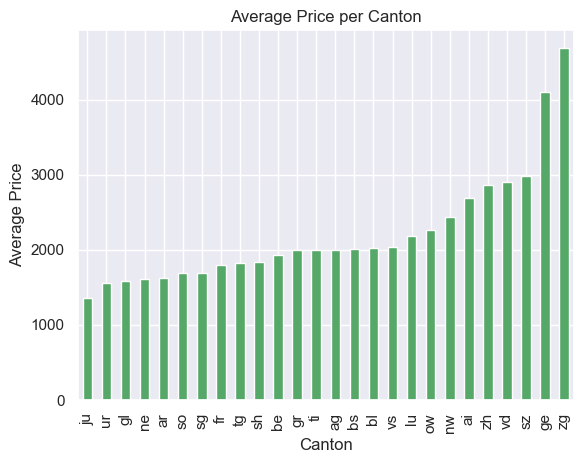

In [55]:
#Barplot average price / canton

average_prices = df_filtered_property_location_clean.groupby('Canton')['Price'].mean().sort_values()
average_prices.plot(kind='bar',color='g')
plt.title('Average Price per Canton')
plt.xlabel('Canton')
plt.ylabel('Average Price')

plt.show()


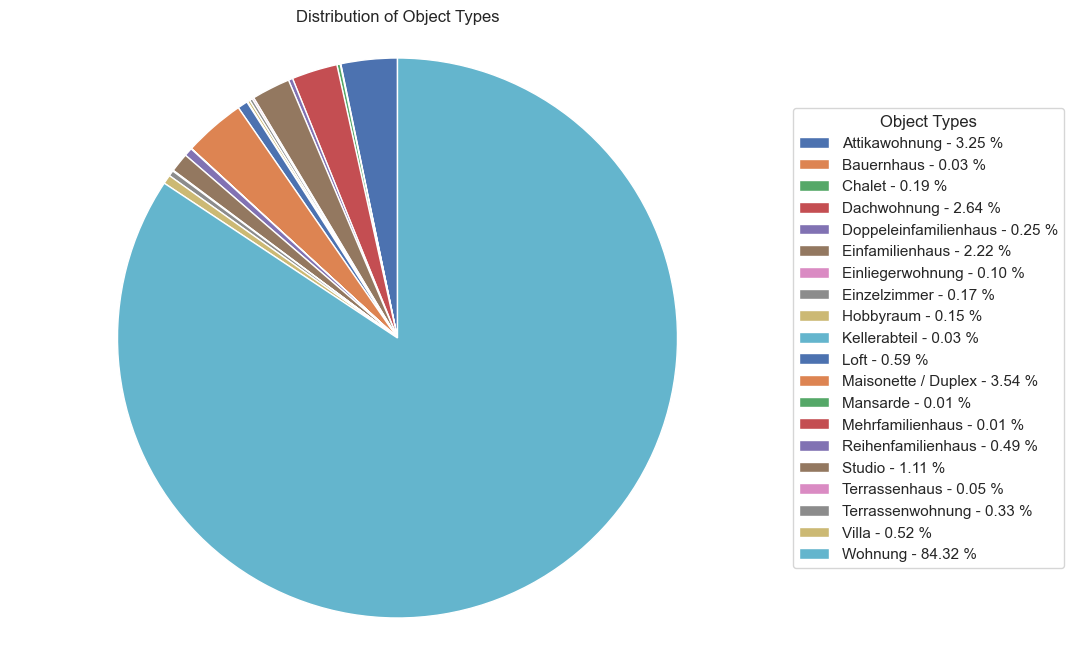

In [56]:
object_type_counts = df_filtered_property_location_clean.groupby('ObjectType').size()

# Calculate percentages
percentages = 100 * object_type_counts / object_type_counts.sum()

# Create labels for the legend with percentages
legend_labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(object_type_counts.index, percentages)]

# Apply Seaborn style
sns.set(style="whitegrid")

# Create a pie chart
plt.figure(figsize=(10, 8))
patches, texts = plt.pie(object_type_counts, labels=None, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Place the legend with the percentages labels
plt.legend(patches, legend_labels, title="Object Types", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Object Types')
plt.show()

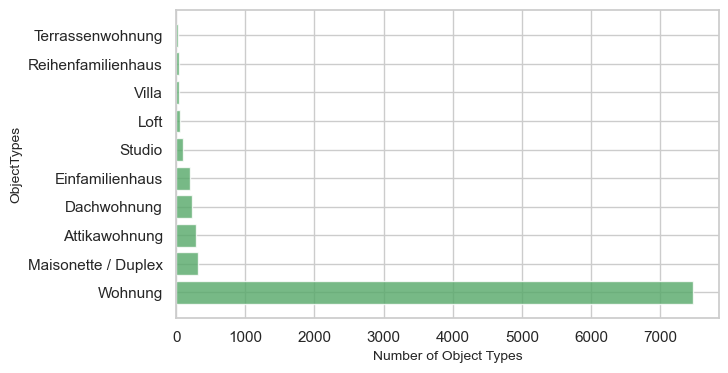

In [57]:
# Barchart top 10 ObjectTypes
#Group data by ObjectType (only the topmost 10 values are shown)
df_bar_property = df_filtered_property_location_clean['ObjectType'].value_counts().nlargest(10).sort_values(ascending=False)

# Values for barchart
napart = list(df_bar_property.values)
index = list(df_bar_property.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of Object Types', fontsize=10)
ax.set_ylabel('ObjectTypes', fontsize=10)

# Show graph
plt.show()

In [58]:
#Extreme values

# Low costs apartments
df_filtered_property_location_clean[df_filtered_property_location_clean['Price_per_m2'] <= 10]

# Very expensive apartments
df_filtered_property_location_clean[df_filtered_property_location_clean['Price_per_m2'] >= 100]

,ListingId,Timestamp,Rooms,SquareMeter,Floor,Availability,ObjectType,YearBuilt,Price,AdditionalCost,...,municipality,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
1354,4000857273,2024-03-27 13:52:45,7.5,230.0,NaN,Nach Vereinbarung,Einfamilienhaus,NaN,25000.0,NaN,...,Horw,160.0,145.00,160.0,145.00,1108.0,2,0,0,108.695652
1356,4000465081,2024-03-29 22:19:24,1.0,25.0,5,Sofort,Wohnung,NaN,2700.0,NaN,...,Genève,147.5,45.49,147.5,45.49,12811.0,10,9,79,108.000000
3878,4000920597,2024-03-24 01:42:30,3.0,36.0,4,Sofort,Dachwohnung,2023-01-01,4120.0,NaN,...,Zürich,99.0,119.00,99.0,119.00,4779.0,7,3,27,114.444444
4142,3003168603,2024-03-24 02:44:06,2.0,32.0,NaN,Nach Vereinbarung,Wohnung,NaN,3519.0,129.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,10,1,35,109.968750
4260,3003169151,2024-03-24 03:15:30,2.0,46.0,NaN,Nach Vereinbarung,Wohnung,NaN,5076.0,186.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,7,4,76,110.347826
4261,3003169310,2024-03-24 03:14:31,2.0,37.0,NaN,Nach Vereinbarung,Wohnung,NaN,4142.0,152.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,9,5,126,111.945946
4266,3003168595,2024-03-24 03:17:41,1.0,36.0,NaN,Nach Vereinbarung,Wohnung,NaN,4246.0,156.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,7,4,76,117.944444
7725,4000969668,2024-03-29 13:26:53,2.0,9.0,1,01.08.2024,Einzelzimmer,NaN,900.0,100.0,...,Renens (VD),155.0,77.00,155.0,77.00,7080.0,4,2,9,100.000000
8219,4000842714,2024-03-29 18:58:03,1.5,13.0,2,Sofort,Wohnung,2018-01-01,1530.0,NaN,...,Sion,100.0,110.00,100.0,110.00,995.0,4,0,3,117.692308
8734,4000665076,2024-03-29 22:18:16,1.0,15.0,1,Nach Vereinbarung,Wohnung,NaN,3420.0,NaN,...,Genève,147.5,45.49,147.5,45.49,12811.0,12,7,85,228.000000


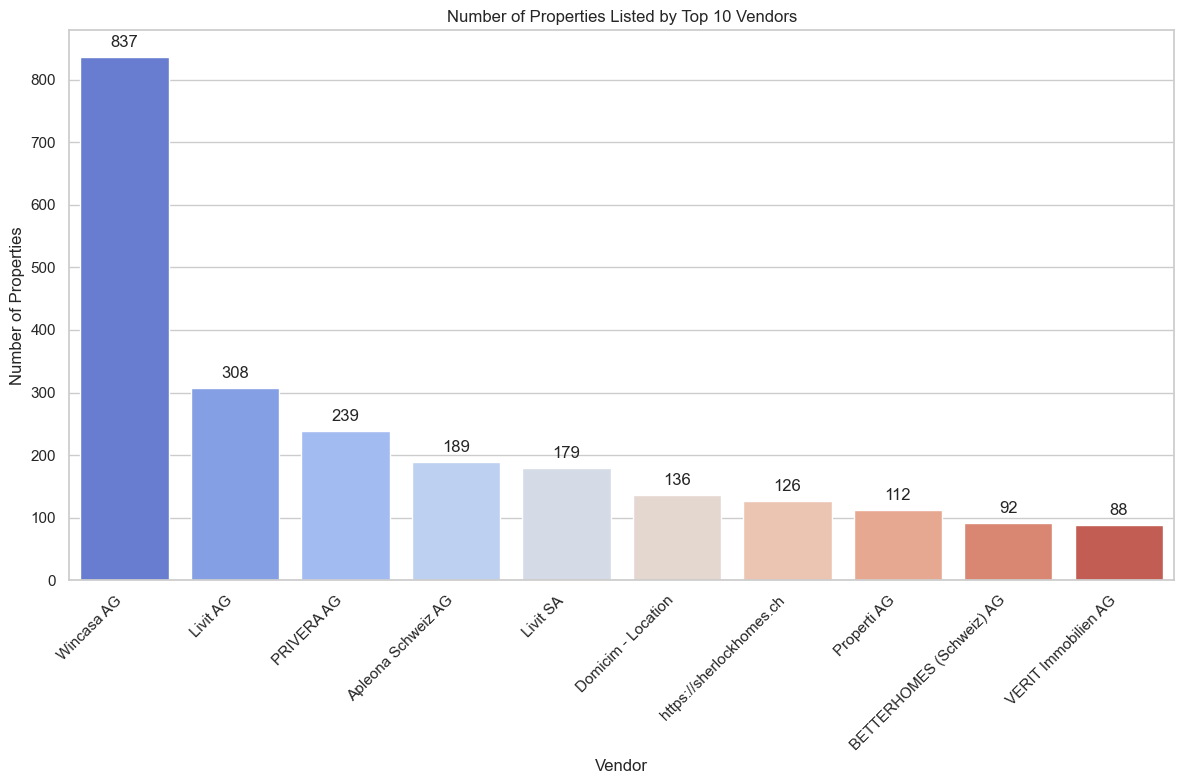

In [59]:
#Count of properties listed by each vendor-only top 10 vendors

# Calculate counts for each vendor
vendor_counts = df_filtered_property_location_clean['Vendor'].value_counts()

# Get the top 10 vendors
top_vendors = vendor_counts.nlargest(10).index

# Filter the DataFrame to include only rows with the top 10 vendors
top_vendors_data = df_filtered_property_location_clean[df_filtered_property_location_clean['Vendor'].isin(top_vendors)]

# Apply Seaborn style
sns.set(style="whitegrid")

# Create a count plot for the 'Vendor' column with only the top 10 vendors
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Vendor', data=top_vendors_data, palette='coolwarm', order=top_vendors)

# Rotate the x labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Add a title and labels
plt.title('Number of Properties Listed by Top 10 Vendors')
plt.xlabel('Vendor')
plt.ylabel('Number of Properties')

# Optional: Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()  # Adjust layout to fit the rotated x labels
plt.show()

In [60]:
#Multivariate non-graphical exploratory data analysis (EDA)
#Cross-tabulation
pd.crosstab(df_filtered_property_location_clean['SquareMeter'], df_filtered_property_location_clean['Price'])


Price,140.0,200.0,250.0,260.0,290.0,300.0,399.0,400.0,425.0,450.0,...,13000.0,13250.0,13600.0,14000.0,14500.0,15000.0,16000.0,18000.0,20000.0,25000.0
SquareMeter,,,,,,,,,,,,,,,,,,,,,
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11.0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [61]:
# Crosstab of Rooms and Price (assuming 'Price' is categorized or binned for better visualization)
price_bins = pd.cut(df_filtered_property_location_clean['Price'], bins=8)  # Bins prices into 5 categories
rooms_vs_price = pd.crosstab(df_filtered_property_location_clean['Rooms'], price_bins)

# Display the crosstab
print(rooms_vs_price)

Price  (115.14, 3247.5]  (3247.5, 6355.0]  (6355.0, 9462.5]  \
Rooms                                                         
1.0                 332                 6                 0   
1.5                 270                 0                 0   
2.0                 411                19                 1   
2.5                1220                34                 0   
3.0                 729                18                 2   
3.5                2368               106                 6   
4.0                 433                51                 1   
4.5                1760               171                19   
5.0                  89                49                 4   
5.5                 318               102                13   
6.0                  30                39                 5   
6.5                  46                48                12   
7.0                   9                16                 6   
7.5                   9                24              

In [62]:
# Definiere die Preisintervalle von 1000 bis 3250 in Schritten von 500
bins = range(1000, 3750, 500)  # 3750, weil die obere Grenze in `range` exklusiv ist

# Teile die Preise in Kategorien auf
df_filtered_property_location_clean['Price Category'] = pd.cut(df_filtered_property_location_clean['Price'], bins=bins, labels=[f"{int(b)}-{int(b+500)}" for b in bins[:-1]])

# Filtere den DataFrame für den spezifischen Preisbereich (optional)
filtered_df = df_filtered_property_location_clean[
    (df_filtered_property_location_clean['Price'] >= 1000) &
    (df_filtered_property_location_clean['Price'] <= 3250)
]

# Erstelle eine Kreuztabelle für den gefilterten Bereich
filtered_rooms_vs_price = pd.crosstab(filtered_df['Rooms'], filtered_df['Price Category'])

# Anzeige der gefilterten Kreuztabelle
print("Kreuztabelle für den Preisbereich von 1000 bis 3250 in 500er Intervallen:")
print(filtered_rooms_vs_price)

Kreuztabelle für den Preisbereich von 1000 bis 3250 in 500er Intervallen:
Price Category  1000-1500  1500-2000  2000-2500  2500-3000  3000-3500
Rooms                                                                
1.0                    96         39          9          9          0
1.5                    91         43         12          4          1
2.0                   214         88         30         13          2
2.5                   515        453        117         56          5
3.0                   292        283         77         28         15
3.5                   494       1115        489        194         42
4.0                   124        163         86         45         11
4.5                   175        713        549        264         52
5.0                     8         27         32         15          6
5.5                     3         63        116        116         20
6.0                     0          5         10         11          5
6.5             

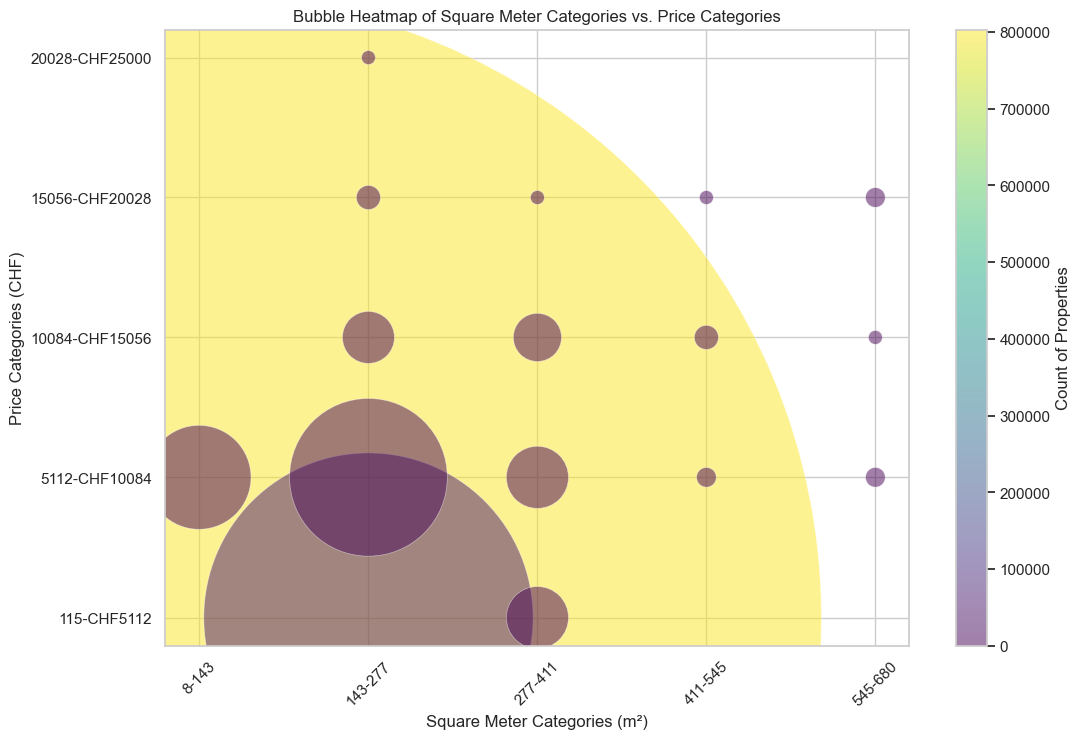

In [63]:
# Bin both SquareMeter and Price for a more manageable visualization
square_meter_bins = pd.cut(df_filtered_property_location_clean['SquareMeter'], bins=5)
price_bins = pd.cut(df_filtered_property_location_clean['Price'], bins=5)

# Create the crosstab
area_vs_price = pd.crosstab(square_meter_bins, price_bins)

# Obtain the mid values of each bin for accurate plotting
square_mid = [bin.mid for bin in square_meter_bins.cat.categories]
price_mid = [bin.mid for bin in price_bins.cat.categories]

# Generate coordinates for square meters and prices
square_meters = np.repeat(square_mid, len(price_mid))
prices = np.tile(price_mid, len(square_mid))

# Sizes for the bubbles based on the crosstab counts, scaled for better visualization
sizes = area_vs_price.values.flatten() * 100

# Create the bubble heatmap (scatter plot)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(square_meters, prices, s=sizes, alpha=0.5, cmap='viridis', c=sizes, edgecolors='w', linewidths=0.5)

# Create a color bar
plt.colorbar(scatter, label='Count of Properties')

# Add titles and labels
plt.title('Bubble Heatmap of Square Meter Categories vs. Price Categories')
plt.xlabel('Square Meter Categories (m²)')
plt.ylabel('Price Categories (CHF)')
plt.xticks(ticks=square_mid, labels=[f'{int(cat.left)}-{int(cat.right)}' for cat in square_meter_bins.cat.categories], rotation=45)
plt.yticks(ticks=price_mid, labels=[f'{int(cat.left)}-CHF{int(cat.right)}' for cat in price_bins.cat.categories])

# Show the plot
plt.show()

In [64]:
#Heatmap erstellen mit longitude, latitude, Price - Price ist das Gewicht für jeden Punkt - Orte mit höheren Preisen sind intensiver gefärbt 
#Bereiche mit hoher Konzentration an teuren Immobilien sind intensiver gefärbt 
#(Skalierung Preis: Wenn die Preisunterschiede gross sind, könnten einige Bereiche übermässig hervorgehoben werden, während andere unterrepräsentiert bleiben (Normalisierung oder Standardisierung des Preises allenfalls sinnvoll)
map = folium.Map(location=[df_filtered_property_location_clean['latitude'].mean(), df_filtered_property_location_clean['longitude'].mean()], zoom_start=12)

# Erstelle Daten für die Heatmap
heat_data = [[row['latitude'], row['longitude'], row['Price']] for index, row in df_filtered_property_location_clean.iterrows()]

# Füge die Heatmap zum Map-Objekt hinzu
HeatMap(heat_data).add_to(map)

# Optional: Füge Marker mit Tooltips hinzu
for index, row in df_filtered_property_location_clean.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"<strong>Preis:</strong> {row['Price']} CHF<br><strong>Zimmer:</strong> {row['Rooms']}<br><strong>Quadratmeter:</strong> {row['SquareMeter']} m²",
        tooltip=f"Klicke für mehr Infos"
    ).add_to(map)

# Speichere oder zeige die Karte an
map.save('Heatmap.html')
#map

In [65]:
#Heatmap erstellen mit longitude, latitude, Price - Price ist das Gewicht für jeden Punkt - Orte mit höheren Preisen sind intensiver gefärbt 
#Bereiche mit hoher Konzentration an teuren Immobilien sind intensiver gefärbt 
#(Skalierung Preis: Wenn die Preisunterschiede gross sind, könnten einige Bereiche übermässig hervorgehoben werden, während andere unterrepräsentiert bleiben (Normalisierung oder Standardisierung des Preises allenfalls sinnvoll)
map = folium.Map(location=[df_filtered_property_location_clean['latitude'].mean(), df_filtered_property_location_clean['longitude'].mean()], zoom_start=12)

# Erstelle Daten für die Heatmap
heat_data = [[row['latitude'], row['longitude'], row['Price']] for index, row in df_filtered_property_location_clean.iterrows()]

# Füge die Heatmap zum Map-Objekt hinzu
HeatMap(heat_data).add_to(map)

# Speichere oder zeige die Karte an
#map.save('Heatmap.html')
map

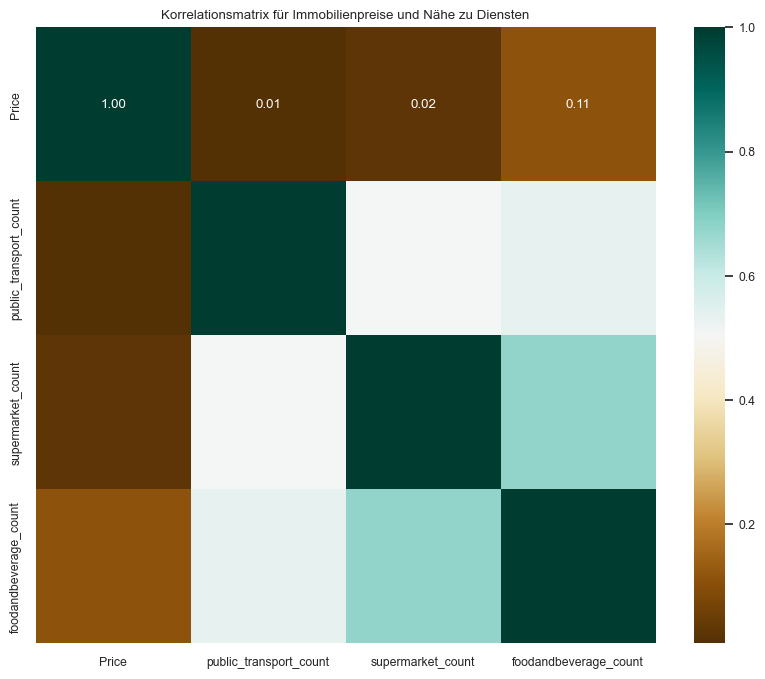

In [70]:
df_filtered_property_location_clean.dropna(subset=['Price', 'public_transport_count', 'supermarket_count', 'foodandbeverage_count'], inplace=True)

# Berechnung der Korrelationsmatrix
correlation_matrix = df_filtered_property_location_clean[['Price', 'public_transport_count', 'supermarket_count', 'foodandbeverage_count']].corr()

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='BrBG', cbar=True)
plt.title('Korrelationsmatrix für Immobilienpreise und Nähe zu Diensten')
plt.show()

In [67]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AnninaBerweger\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AnninaBerweger\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\AnninaBerweger\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [68]:
from textblob import TextBlob

# Angenommen, dein DataFrame heißt df_filtered_property_location_clean
# Ersetze Nicht-Wörter, führe eine untere Normalisierung durch und behandle fehlende Werte
df_filtered_property_location_clean['cleaned_description'] = df_filtered_property_location_clean['PropertyDescription'].astype(str).str.lower().str.replace('[^\w\s]', '', regex=True)

# Funktion zur Berechnung der Sentiment-Werte
def calculate_sentiment(text):
    if text:  # Überprüfen, ob der Text nicht leer ist
        blob = TextBlob(text)
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    else:
        return 0, 0  # Zurückgeben neutraler Werte, wenn kein Text vorhanden ist

# Anwenden der Sentiment-Analyse auf jede Beschreibung
df_filtered_property_location_clean[['polarity', 'subjectivity']] = df_filtered_property_location_clean['cleaned_description'].apply(
    lambda x: pd.Series(calculate_sentiment(x))
)

# Anzeigen einiger Ergebnisse zur Überprüfung
print(df_filtered_property_location_clean[['PropertyDescription', 'polarity', 'subjectivity']].head(50))


                                  PropertyDescription  polarity  subjectivity
0   La Residenza Delta si trova a Capolago, situat... -0.062500      0.312500
1   La Residenza Martina, progettata dall’Architet...  0.000000      0.000000
2   Affittasi 2 locali grazioso e luminoso in un q...  0.000000      0.500000
3   Siamo a Pazzallo, a circa 10 minuti dal centro...  0.000000      0.000000
4   A Bissone affittiamo appartamento arredato di ...  0.000000      0.000000
5   Sei alla ricerca di un ufficio / spazio commer...  0.000000      0.000000
6   Luminoso 3.5 locali ristrutturatoCaslano, a po...  0.000000      0.000000
7                                                 NaN  0.000000      0.000000
8   Da subito affittiamo bilocali in ottima posizi...  0.000000      0.000000
9   Residenza 2 Grappoli - GudoAppartamento 32 al ...  0.000000      0.000000
10  Affittiamo nelle dirette vicinanze del lago e ...  0.000000      0.000000
11  Affittiamo recente appartamento di 3,5 locali ... -0.125000 

                    Rooms  SquareMeter  Price  Price_per_m2  \
Rooms                1.00         0.79   0.54         -0.27   
SquareMeter          0.79         1.00   0.70         -0.24   
Price                0.54         0.70   1.00          0.37   
Price_per_m2        -0.27        -0.24   0.37          1.00   
population_density  -0.07        -0.06   0.21          0.41   

                    population_density  
Rooms                            -0.07  
SquareMeter                      -0.06  
Price                             0.21  
Price_per_m2                      0.41  
population_density                1.00  


<Axes: >

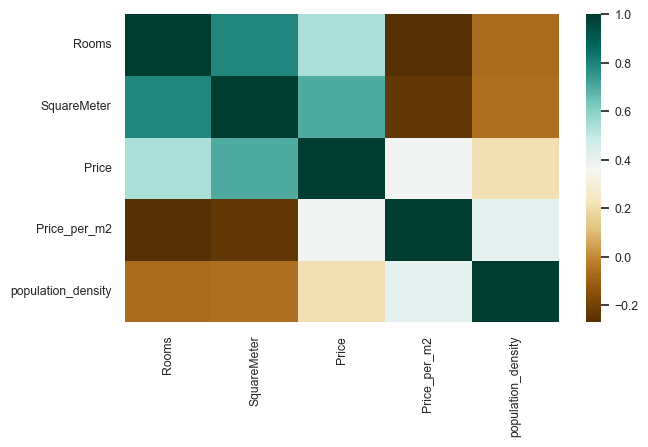

In [69]:
#Correlation heatmap (seaborn)

# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
corr = df_filtered_property_location_clean[['Rooms', 
            'SquareMeter', 
            'Price', 
            'Price_per_m2',
            'population_density']].corr().round(2)
print(corr)

# Plot heatmap
plt.figure(figsize=(7,4))
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=False)

In [ ]:
#weitere Beispiele EDA: 
#https://github.com/aberweger/Explorative_Data_Analysis_and_Visualization/blob/master/exploratory_data_analysis_apartments_data.ipynb
#https://seaborn.pydata.org/archive/0.11/generated/seaborn.barplot.html
#https://medium.com/analytics-vidhya/apartment-market-web-scrapping-and-eda-using-python-a9eacf6d64e2
#https://www.kaggle.com/code/dgawlik/house-prices-eda
